### Dřeviny

Tabulka dreviny v naší databázi obsahuje informace o těžbě dřeva podle druhů dřevin a typu těžby. Objem těžby se nachází ve sloupci hodnota.

Pomocí SQL dotazu do databáze si připrav dvě pandas tabulky:
tabulka smrk bude obsahovat řádky, které mají v sloupci dd_txt hodnotu "Smrk, jedle, douglaska"

tabulka nahodila_tezba bude obsahovat řádky, které mají v sloupci druhtez_txt hodnotu "Nahodilá těžba dřeva"

Vytvoř graf, který ukáže vývoj objemu těžby pro tabulku smrk. Pozor, řádky nemusí být seřazené podle roku.

Vytvoř graf (nebo několik grafů), který ukáže vývoj objemu těžby v čase pro všechny typy nahodilé těžby. Můžeš použít vlastní postup, nebo postupuj podle jedné z nápověd:

První metoda: agreguj tabulku nahodila_tezba pomocí metody pivot_table a na výsledek zavolej metodu plot().

Druhá metoda: agreguj tabulku nahodila_tezba pomocí metody groupby a na výsledek zavolej metodu plot(), kde specifikuješ, který sloupec bude na ose x, a který na ose y.

Dobrovolný doplněk
Čím je způsobený prudký nárůst těžby jehličnatých stromů cca od roku 2015, který je viditelný v grafu z bodu (2.)?
Kolem roku 2007 vidíme v obou grafech krátkodobý nárůst těžby. Čím byl způsobený (můžeš zkusit dohledat konkrétní událost)?

In [1]:
import pandas as pd
import psycopg2
import sqlalchemy
from sqlalchemy import create_engine, inspect
import os
import matplotlib.pyplot as plt
import numpy


In [2]:
HOST = "czechitaspsql.postgres.database.azure.com"
PORT = 5432
USER = "hrickovad"
USERNAME = f"{USER}@czechitaspsql"
DATABASE = "postgres"
PASSWORD = "xdJ0X?rd=UeJmnEZ"

In [3]:
engine = create_engine(f"postgresql://{USERNAME}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}", echo = False)

In [4]:
inspector = inspect(engine)

In [5]:
print(inspector.get_table_names())

['users_cz-vyskoc', 'users', 'uzivatele-username', 'users_test_users', 'uzivatel-z.drbalova', 'dreviny', 'uzivatele-aneska.houskova', 'uzivatele-tb.bohata', 'uzivatele-sisamyska', 'uzivatele-ivetach', 'uzivatele-cimbalakova.hana.3', 'uzivatele-anetadedkova21', 'uzivatele-z.drbalova', 'uzivatele-info', 'uzivatele-veronika.flokova', 'uzivatele-d.galavska', 'uzivatele-hizova.k', 'uzivatele-katroskaa', 'uzivatele-hrickovad', 'uzivatele-ivancova.miroslava', 'uzivatele-klarunkax', 'uzivatele-lenka.kocmanova', 'uzivatele-jarmila.kowolowska', 'uzivatele-helena.kuthanova', 'uzivatele-Markova.com', 'uzivatele-alzbetamartincova', 'uzivatele-n.ilona', 'uzivatele-anna.ocilkova', 'uzivatele-zuzana.ondruchova', 'uzivatele-zuzana.opletalova', 'uzivatele-pajerova.hedvika', 'uzivatele-verzus.mining', 'uzivatele-m.rezakova', 'uzivatele-andrea.stolfova', 'uzivatele-petra.slanarova', 'uzivatele-lucie', 'uzivatele-petraprincova', 'uzivatele-stark', 'uzivatele-mirek.stransky', 'uzivatele-miriamatyralova', 'u

In [6]:
dreviny = pd.read_sql("dreviny", con = engine)

In [7]:
dreviny

,idhod,hodnota,stapro_kod,dd_cis,dd_kod,druhtez_cis,druhtez_kod,prictez_cis,prictez_kod,rok,uzemi_cis,uzemi_kod,dd_txt,druhtez_txt,prictez_txt,ELPRO_ID
0,701338116,16736274,5966,NaN,NaN,NaN,NaN,NaN,NaN,2010,97,19,None,None,None,1336119
1,701338296,385605,5966,203.0,21.0,NaN,NaN,NaN,NaN,2010,97,19,Dub,None,None,1845096
2,701338310,812475,5966,202.0,14.0,NaN,NaN,NaN,NaN,2010,97,19,Buk,None,None,1845097
3,701338324,68687,5966,202.0,17.0,NaN,NaN,NaN,NaN,2010,97,19,Jasan,None,None,1845098
4,701338161,6458564,5966,NaN,NaN,199.0,22.0,NaN,NaN,2010,97,19,None,Nahodilá těžba dřeva,None,1845105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,885436733,26243307,5966,NaN,NaN,199.0,22.0,206.0,3.0,2020,97,19,None,Nahodilá těžba dřeva,Hmyzová příčina,10009761
437,885436979,4597015,5966,NaN,NaN,199.0,22.0,206.0,1.0,2020,97,19,None,Nahodilá těžba dřeva,Živelní příčina,10009763
438,885437238,14384,5966,NaN,NaN,199.0,22.0,206.0,2.0,2020,97,19,None,Nahodilá těžba dřeva,Exhalační příčina,10009764
439,885437222,36046,5966,203.0,23.0,NaN,NaN,NaN,NaN,2020,97,19,"Habr, jilm, akát a ostatní listnaté dřeviny",None,None,10009765


In [8]:
smrk = pd.read_sql("SELECT * from dreviny WHERE dd_txt= 'Smrk, jedle, douglaska' ", con = engine)

In [9]:
smrk = smrk.sort_values("rok", ascending = True)

<AxesSubplot:title={'center':'Vývoj těžby'}, xlabel='rok'>

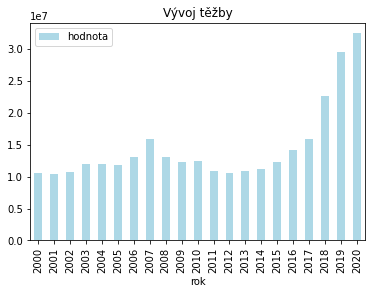

In [10]:
smrk.plot(kind="bar",color="lightblue",x="rok", y="hodnota", title="Vývoj těžby")

In [11]:
nahodila_tezba = pd.read_sql("SELECT * from dreviny WHERE druhtez_txt='Nahodilá těžba dřeva'", con = engine)

In [12]:
tezba = nahodila_tezba.groupby(['prictez_txt','rok'])['hodnota'].sum()


In [13]:
tezba_df = pd.DataFrame(data= tezba)
tezba_df = tezba_df.reset_index()
tezba_df_pokus = tezba_df[tezba_df['prictez_txt'] == "Exhalační příčina"]

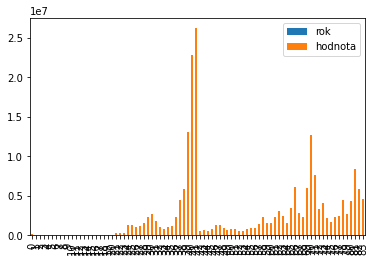

In [14]:
ax = tezba_df.plot.bar(stacked=True) 